```MSSV```: 19521386

```Name```: Bui Tri Dung

```Problem```: Compare Two Picture 

#Get images from drive

In [1]:
from google.colab import drive  

In [2]:
drive.mount('/gdrive') 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import os

In [4]:
dir_monhoc = '/gdrive/MyDrive/CS231.L22.KHCL'
dir_baitap= os.path.join(dir_monhoc, 'SoSanh2Anh')

In [5]:
import cv2 as cv 
from google.colab.patches import cv2_imshow

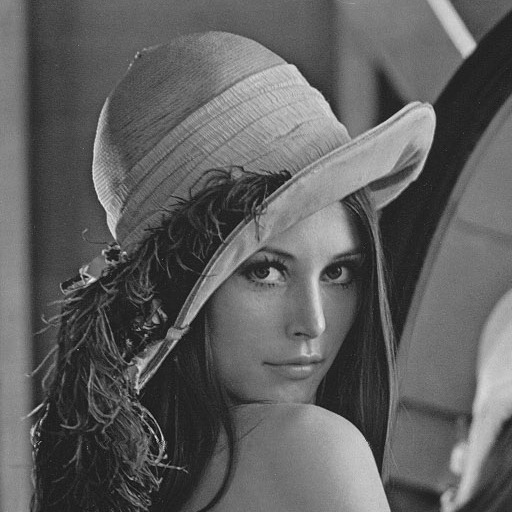

In [6]:
path_filename = os.path.join(dir_baitap, 'lena.jpg')
img = cv.imread(path_filename, 0)
cv2_imshow(img)

# Compare two images

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

In [8]:
def prtplt(hist): 
    plt.plot(hist) 
    plt.xlim([0, 256]) 
    plt.legend(('histogram'), loc = 'upper left') 
    plt.show()

In [9]:
def TinhHist(pathfilename): 
    img = cv.imread(pathfilename, 0)
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    size = img.shape[0]*img.shape[1]
    hist = hist / size 
    return hist

In [10]:
path_first = os.path.join(dir_baitap, 'lena.jpg')
path_second = os.path.join(dir_baitap, 'lena256.jpg')

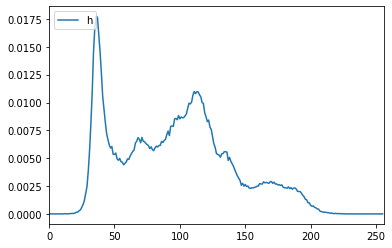

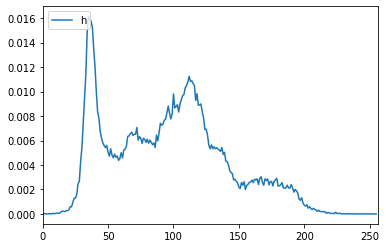

In [11]:
value_hist_first = TinhHist(path_first) 
value_hist_second = TinhHist(path_second) 

prtplt(value_hist_first)
prtplt(value_hist_second)

In [12]:
from scipy.spatial import distance

In [13]:
distance.euclidean(value_hist_first, value_hist_second)

0.006519829878930243

## Get dataset which contains 50 images.

In [14]:
link_dataset = os.path.join(dir_baitap, 'Holiday50') 
img = []
cnt =0 

for _ in os.walk(link_dataset):
    for i in _: 
        if cnt > 0:
            for j in i: 
                img.append(os.path.join(link_dataset, j)) 
        cnt += 1

The picture has been chosen


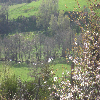

In [15]:
choose = 5
print("The picture has been chosen")
cv2_imshow(cv.resize(cv.imread(img[choose]), (100, 100)))

In [16]:
dis = [(distance.euclidean(TinhHist(img[choose]), TinhHist(img[i])), img[i]) for i in range(0, len(img))]

In [17]:
def sort_pair(arr): 
    arr.sort(key = lambda x: x[0])
    return arr

In [18]:
dis = sort_pair(dis)

## Top 5 images which has minimun distance with orginal image.

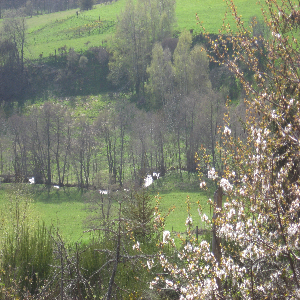

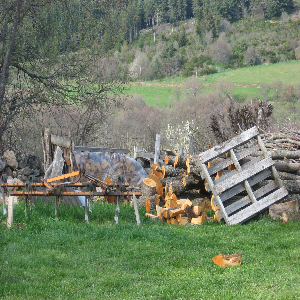

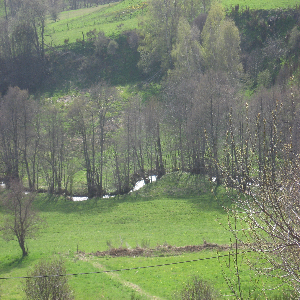

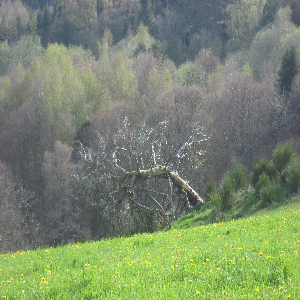

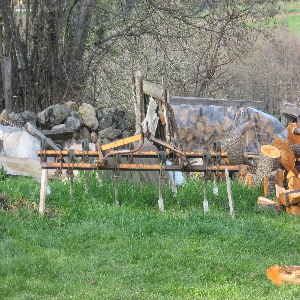

In [19]:
for i in range(0, 5, 1): 
    distance, link = dis[i] 
    im = cv.imread(link)
    ims = cv.resize(im, (300, 300))
    cv2_imshow(ims)
    print()
    # cv2_imshow(cv.imread(link))
